In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob
import os
%matplotlib inline

### Find Corners

Grey image shape (height, width): **gray.shape[::-1]**

Color image shape (height, width): **img.shape[1::-1]**
- This code asks for just first two values, and reverse them
- shape array of a color image might be (960, 1280, 3), result should be (960, 1280)

In [10]:
objpoints = [] # 3D points in real world spcae
imgpoints = [] # 2D points in image plans

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ... (7,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2) # x, y coordinate

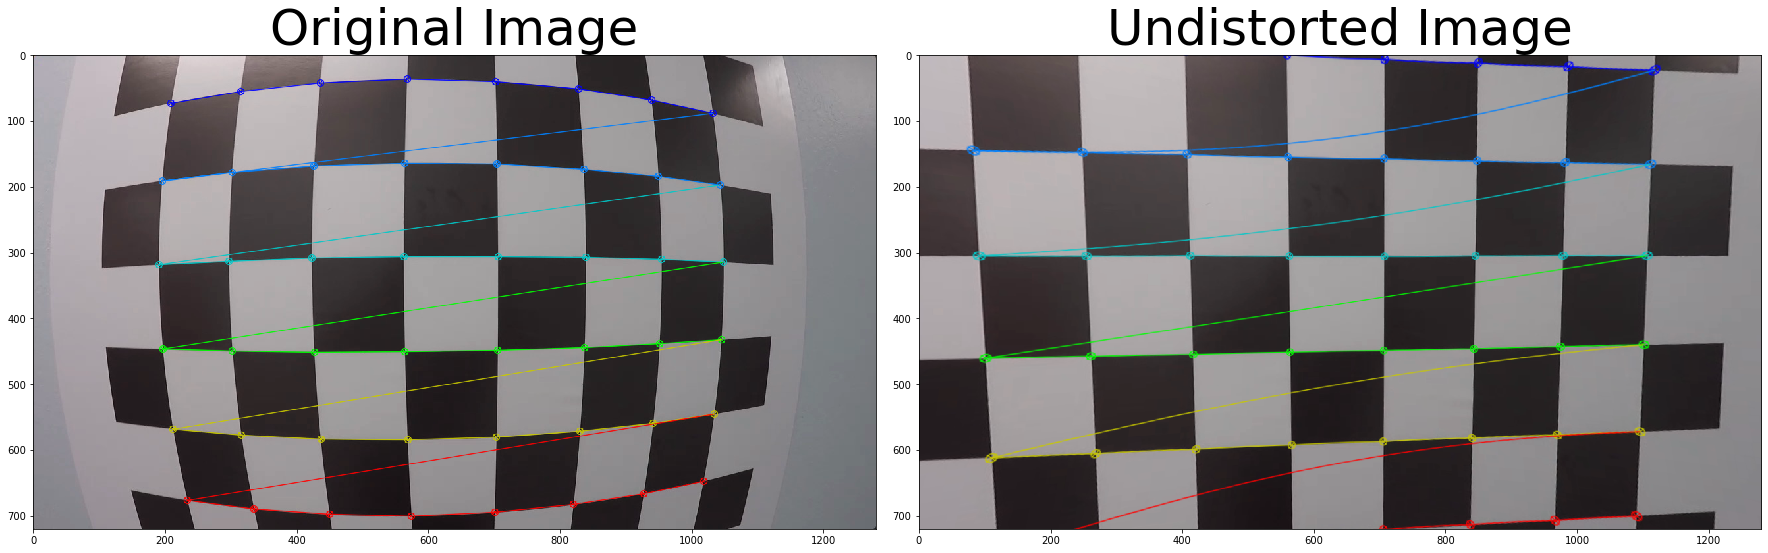

In [11]:
# prepare object points
nx = 8 #  number of corners in any given row (x)
ny = 6 #  number of corners in a given column (y)

# Read image and convert to grey scale
fname = './image/calibration_test.png'
img = cv2.imread(fname)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    img_draw = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

def cal_undistort(img, objpoints, imgpoints):
    distored = np.copy(img)
    
    img_shape = (img.shape[1], img.shape[0]) #img.shape[::-1]
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
                                objpoints, imgpoints, img_shape,None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    return undist


undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_draw)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### undistort image

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('./camera_cal/GO*.jpg')

for index, filename in enumerate(images):
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_size = (img.shape[1], img.shape[0])
    
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    
    # If found, add object points, image points
    if ret == True:
        print(filename, " processing")
        objpoints.append(objp)
        imgpoints.append(corners)

        #img_draw = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(index)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
                                objpoints, imgpoints, img_size,None,None)
        undist = cv2.undistort(img, mtx, dist, None, mtx)
        cv2.imwrite('./camera_undist/undist {}.jpg'.format(filename[-8:-4]), undist)
        
        # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
        dist_pickle = {}
        dist_pickle["mtx"] = mtx
        dist_pickle["dist"] = dist
        pickle.dump( dist_pickle, open( "./camera_undist/{}.p".format(filename[-8:-4]), "wb" ) )
        
#         f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#         ax1.imshow(img)
#         ax1.set_title('Original Image', fontsize=30)
#         ax2.imshow(undist)
#         ax2.set_title('Undistorted Image', fontsize=30)

    else:
        print('not founded ', filename)

./camera_cal\GOPR0032.jpg  processing
./camera_cal\GOPR0033.jpg  processing
./camera_cal\GOPR0034.jpg  processing
./camera_cal\GOPR0035.jpg  processing
./camera_cal\GOPR0036.jpg  processing
./camera_cal\GOPR0037.jpg  processing
./camera_cal\GOPR0038.jpg  processing
./camera_cal\GOPR0040.jpg  processing
./camera_cal\GOPR0041.jpg  processing
./camera_cal\GOPR0042.jpg  processing
./camera_cal\GOPR0043.jpg  processing
./camera_cal\GOPR0044.jpg  processing
./camera_cal\GOPR0045.jpg  processing
./camera_cal\GOPR0046.jpg  processing
./camera_cal\GOPR0047.jpg  processing
./camera_cal\GOPR0048.jpg  processing
./camera_cal\GOPR0049.jpg  processing
./camera_cal\GOPR0050.jpg  processing
./camera_cal\GOPR0051.jpg  processing
./camera_cal\GOPR0052.jpg  processing
./camera_cal\GOPR0053.jpg  processing
./camera_cal\GOPR0054.jpg  processing
not founded  ./camera_cal\GOPR0055.jpg
./camera_cal\GOPR0057.jpg  processing
./camera_cal\GOPR0058.jpg  processing
./camera_cal\GOPR0059.jpg  processing
./camera_ca

### Perspective Transform

In [4]:
%matplotlib qt

In [5]:
img = mpimg.imread('./perspective/stop_sign.jpg')
plt.imshow(img)
#zoom in the picture and pick the four vertices

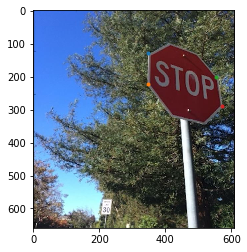

In [6]:
%matplotlib inline
plt.imshow(img)
plt.plot(348, 129, '.')
plt.plot(348, 223, '.')
plt.plot(555, 202, '.')
plt.plot(572, 288, '.')

In [7]:
def warp(img):
    # Define calibration box in source (original) 
    # and destination (desired orwarped) coordinates
    
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
        [[348, 129], 
         [348, 223],
         [555, 202],
         [572, 288]])
    
    dst = np.float32(
        [[350, 130],
         [350, 220],
         [550, 130],
         [550, 220]])
    
    # compute transformation
    M = cv2.getPerspectiveTransform(src, dst)
    
    # compute inverse transformation by swapping the input parameter
    Minv = cv2.getPerspectiveTransform(dst, src)

    # create warped image - use linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped

many perspective transform algorithms will **automatically** detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels

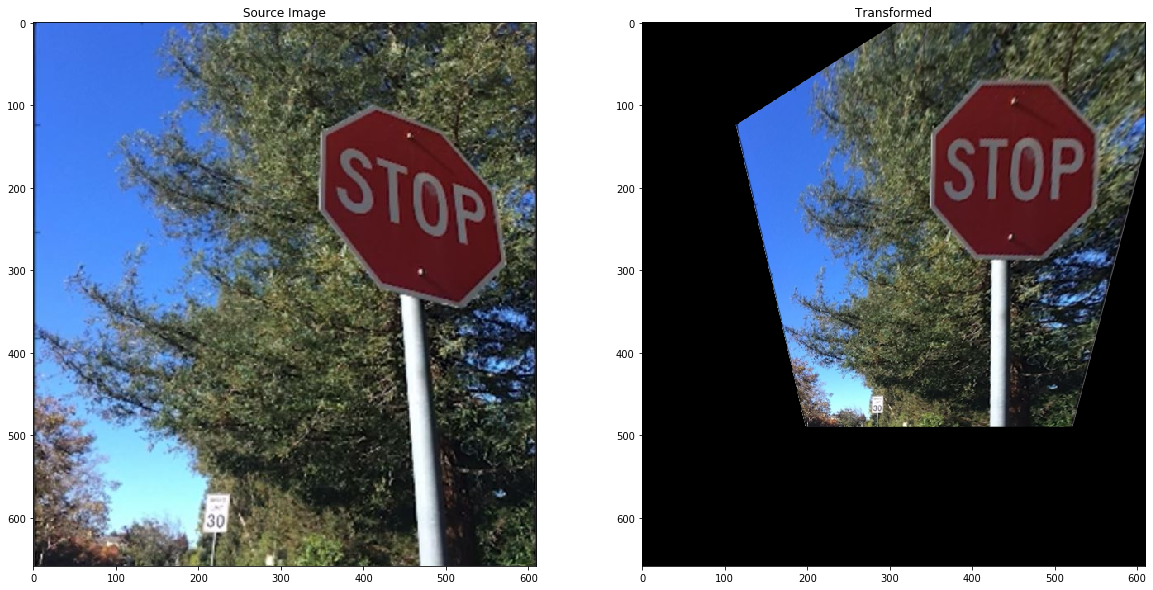

In [8]:
%matplotlib inline
warped_im = warp(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Source Image'); ax1.imshow(img)
ax2.set_title('Transformed'); ax2.imshow(warped_im)

In [42]:
objpoints = [] # 3D points in real world spcae
imgpoints = [] # 2D points in image plans

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ... (7,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2) # x, y coordinate

nx = 8 #  number of corners in any given row (x)
ny = 6 #  number of corners in a given column (y)

# Read image and convert to grey scale
fname = './image/calibration_test.png'
img = cv2.imread(fname)

In [43]:
def corners_unwarp(img, nx, ny, mtx, dist):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_size = (img.shape[1], img.shape[0]) #img.shape[::-1]
    
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        
        objpoints.append(objp); imgpoints.append(corners)
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
                                objpoints, imgpoints, img_size,None,None)
        undist = cv2.undistort(img, mtx, dist, None, mtx)
        
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], 
                          [img_size[0]-offset, offset], 
                          [img_size[0]-offset, img_size[1]-offset], 
                          [offset,             img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

        # Return the resulting image and matrix
        return warped, M
    else:
        print('None founded')

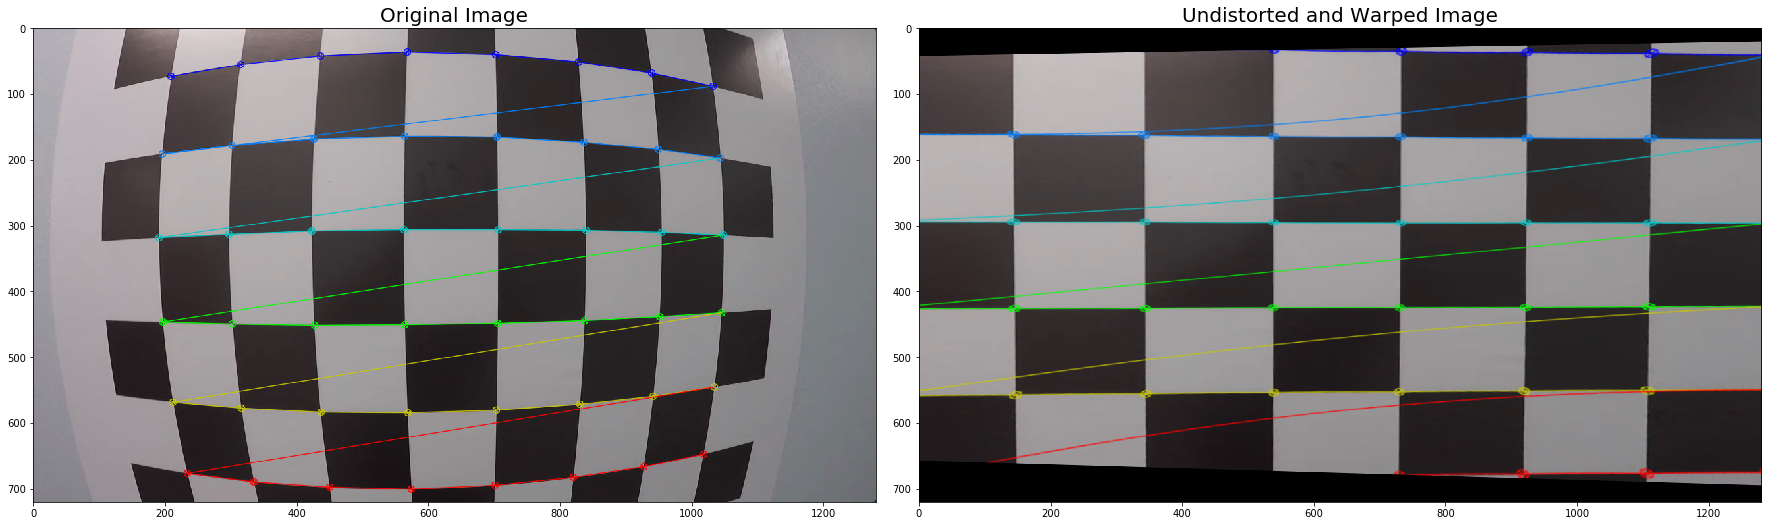

In [44]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)